# Множественная проверка гипотез. Выбросы

## Задача 3

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sts
from matplotlib import pyplot as plt

In [2]:
inform = pd.read_csv('wine.data', header=None)
inform

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
sample = inform.iloc[:, 3]
print(sample)

0      2.43
1      2.14
2      2.67
3      2.50
4      2.87
       ... 
173    2.45
174    2.48
175    2.26
176    2.37
177    2.74
Name: 3, Length: 178, dtype: float64


Мы хотим использовать процедуру, контролирующую FWER на уровне $\alpha$, но не знаем характер зависимости между статистиками, поэтому в данном случае нельзя построить процедуру мощнее, чем метод Холма $\Rightarrow$ будем использовать его.

In [4]:
def holm(pvalues, alpha):
    m = pvalues.shape[0]
    stop = m
    for i, pval in enumerate(sorted(pvalues)):
        if pval >= alpha/(m - i):
            stop = i
            break
    return np.argsort(pvalues)>=stop

In [5]:
p_value = np.zeros(5)
p_value[0] = sts.jarque_bera(sample)[1]
p_value[1] = sts.kstest((sample - sample.mean()) / sample.std(), sts.norm.cdf)[1]
p_value[2] = sts.shapiro(sample)[1]
p_value[3] = sts.normaltest(sample)[1]

In [6]:
value = sts.anderson(sample, 'norm')
value

AndersonResult(statistic=0.6784320885859643, critical_values=array([0.564, 0.642, 0.77 , 0.899, 1.069]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [7]:
p_value[4] = 1.069 #альфа будет от 0.01 до 0.05, лучше уменьшим ошибку 1 рода

In [8]:
holm(p_value, 0.05)

array([False,  True,  True,  True,  True])

Таким образом, отвергаем гипотезу о нормальности распределения выборки $(P(V > 0) \leqslant \alpha).$

## Задача 5

In [9]:
abalone = pd.read_csv("abalone.data", header=None)
wine = pd.read_csv("wine.data", header=None)
tracks = pd.read_csv("go_track_tracks.csv")

In [10]:
abalone_sample = np.zeros((8, 4177))
for i in range(8):
    abalone_sample[i] = abalone.iloc[:, i+1]

In [11]:
tracks_sample = np.zeros((3, 163))
for i in range(3):
    tracks_sample[i] = tracks.iloc[:, i+2]

In [12]:
wine_sample = np.zeros((13, 178))
for i in range(13):
    wine_sample[i] = wine.iloc[:, i+1]

Мы не можем использовать процедуру Бенджамини-Хохберга, так как не знаем, зависимы ли статистики и выполнено ли свойство PDRS. Поэтому воспользуемся процедурой Бенджамини-Иекутиели.

In [13]:
p_value_ab = np.zeros(40)
for i in range(8):
    p_value_ab[i] = sts.skewtest(abalone_sample[i])[1]
    p_value_ab[i+8] = sts.kstest((abalone_sample[i] - abalone_sample[i].mean()) / abalone_sample[i].std(), sts.norm.cdf)[1]
    p_value_ab[i+16] = sts.shapiro(abalone_sample[i])[1]
    p_value_ab[i+24] = sts.normaltest(abalone_sample[i])[1]
    p_value_ab[i+32] = sts.jarque_bera(abalone_sample[i])[1]

In [14]:
p_value_w = np.zeros(65)
for i in range(13):
    p_value_w[i] = sts.skewtest(wine_sample[i])[1]
    p_value_w[i+13] = sts.kstest((wine_sample[i] - wine_sample[i].mean()) / wine_sample[i].std(), sts.norm.cdf)[1]
    p_value_w[i+26] = sts.shapiro(wine_sample[i])[1]
    p_value_w[i+39] = sts.normaltest(wine_sample[i])[1]
    p_value_w[i+52] = sts.jarque_bera(wine_sample[i])[1]

In [15]:
p_value_tr = np.zeros(15)
for i in range(3):
    p_value_tr[i] = sts.skewtest(tracks_sample[i])[1]
    p_value_tr[i+3] = sts.kstest((tracks_sample[i] - tracks_sample[i].mean()) / tracks_sample[i].std(), sts.norm.cdf)[1]
    p_value_tr[i+6] = sts.shapiro(tracks_sample[i])[1]
    p_value_tr[i+9] = sts.normaltest(tracks_sample[i])[1]
    p_value_tr[i+12] = sts.jarque_bera(tracks_sample[i])[1]

In [16]:
pv = np.concatenate([p_value_ab, p_value_tr, p_value_w])

In [17]:
from statsmodels.stats.multitest import multipletests as mlt

In [18]:
ans = mlt(pvals=pv, alpha=0.05, method='fdr_by')
print(np.reshape(ans[0], (-1, 5)))

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [False  True False False  True]
 [False False False  True  True]
 [False False  True False  True]
 [False False False False False]
 [False False False False False]
 [ True False  True False False]
 [ True  True  True  True False]
 [ True False  True  True  True]
 [ True False False  True  True]
 [ True  True False  True False]
 [ True  True False  True False]
 [False  True False False False]
 [False  True False  True  True]]


Принимаем гипотезу о нормальности только для 4 и 5 выборки из wine_sample.

## Задача 4

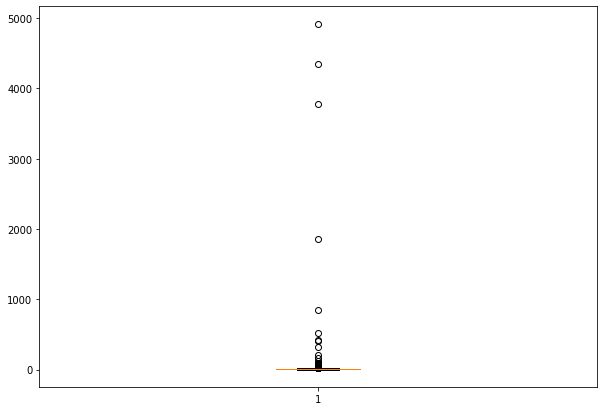

In [19]:
lamps = np.load('hw4t4.npy')
plt.figure(figsize = (10, 7))
plt.boxplot(lamps)
plt.show()

Видим, что выбросы в выборке есть (которые противоречат здравому смыслу). Попробуем использовать критерий Шовенэ.

In [20]:
lamps.shape

(1000,)

In [21]:
blowout = []

In [22]:
for i in range(lamps.shape[0]):
    st = np.abs((lamps[i] - np.mean(lamps)) / np.sqrt(np.var(lamps)))
    if st > sts.norm.ppf(1-(1/4000)):
        blowout.append(lamps[i])

In [23]:
for i in range(len(blowout)):
    lamps = np.delete(lamps, blowout[i])

/Users/anna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  
/Users/anna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  


In [24]:
lamps.shape

(1000,)

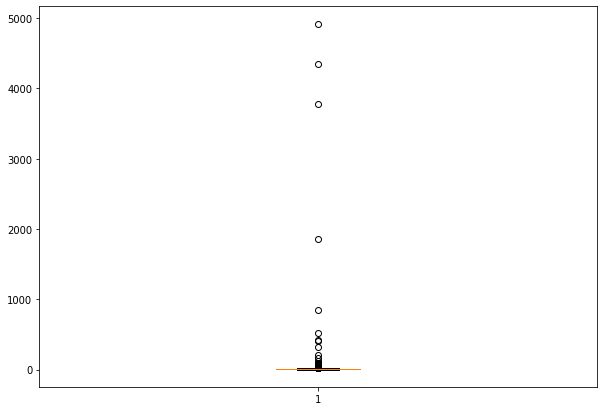

In [25]:
plt.figure(figsize = (10, 7))
plt.boxplot(lamps)
plt.show()

In [26]:
from sklearn.ensemble import IsolationForest

Видим, что мы убрали всего 4 значения и выбросы всё ещё остаются. Воспользуемся алгоритмом Isolation forest.

In [27]:
forest = IsolationForest(contamination=0.03, behaviour='new')
new_lamps = lamps[forest.fit_predict(lamps[:, np.newaxis]) > 0]

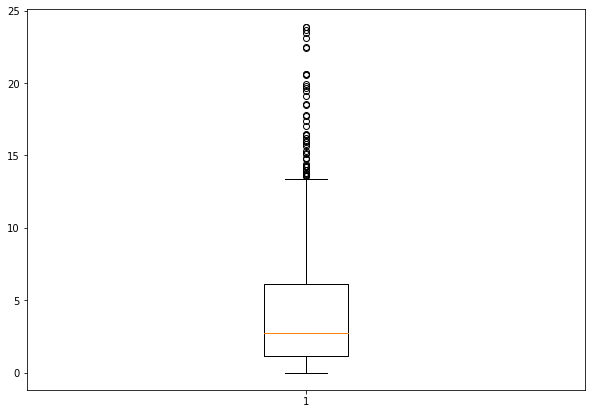

In [28]:
plt.figure(figsize = (10, 7))
plt.boxplot(new_lamps)
plt.show()

In [29]:
new_lamps.shape

(971,)

Видим, что теперь мы убрали куда большее число выбросов и теперь время работы лампочки имеет разумные значения.

In [30]:
a, b = sts.expon.fit(new_lamps)
sts.kstest(new_lamps, 'expon', args = [a, b])

KstestResult(statistic=0.029615003209380375, pvalue=0.3570893451118721)

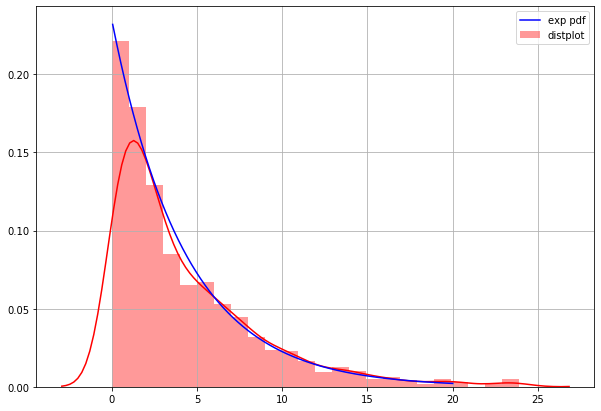

In [43]:
import seaborn as sbs
plt.figure(figsize = (10, 7))
sbs.distplot(new_lamps, color = 'r', label = "distplot")
x = np.linspace(0.05, 20, 1000)
plt.plot(x, sts.expon(a, b).pdf(x), color = "blue", label = "exp pdf")
plt.grid()
plt.legend()
plt.show()

Таким образом, наша выборка скорее всего имеет экспоненциальное распределение.

In [39]:
#среднее время работы лампочки (не учитываем значения выбросов)
time = np.mean(new_lamps)

In [40]:
time

4.26540440743198